# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [8]:
# Your code here.
from sklearn import linear_model
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

student_data=pd.DataFrame({'X':[17,51,27,21,36,48,19,26,54,30], 'Y':[10,1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<function matplotlib.pyplot.show(close=None, block=None)>

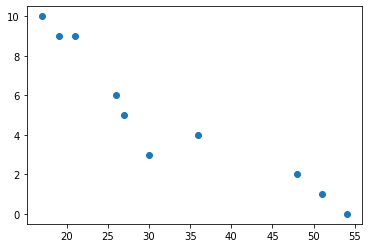

In [19]:
# Your code here.
x=student_data['X']
y=student_data['Y']
plt.scatter(x,y)
plt.show

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here.
# ## Data seems to show a negative relation between age and tardiness. The older the student, the less tendency for delays. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [20]:
# Your response here.

#correlation:
np.corrcoef(x,y)

#covariance:
np.cov(x,y)

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [23]:
# Your response here.
x=student_data[['X']]
y=student_data['Y']
model=linear_model.LinearRegression()
model.fit(x,y)
display(model.intercept_)
display(model.coef_)

12.888803363135771

array([-0.24282077])

Plot your regression model on your scatter plot.

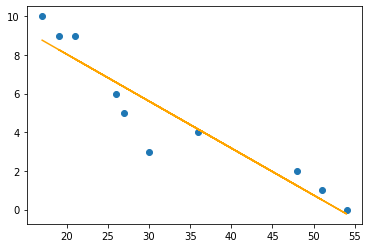

In [25]:
# Your code here.
y_hat=model.intercept_+model.coef_[0]*x
plt.plot(x.values, y_hat.values, c='orange')
plt.scatter(x,y)


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [26]:
# Your response here. 
##Regression is negatively sloped, confirming our 1st impression of relation between variables.
## Correlation is quite high, so model should be good. Running model score confirms this.
model.score(x,y)


0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [30]:
# Import any libraries you may need & the data
data=pd.read_csv('vehicles.csv')
data.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [35]:
# Your response here. 
year=data['Year']
cylinders=data['Cylinders']
fuelbarrels=data['Fuel Barrels/Year']
mpg=data['Combined MPG']
fuelcost=data['Fuel Cost/Year']
co2=data['CO2 Emission Grams/Mile']
display(np.corrcoef(co2,year))
display(np.corrcoef(co2,cylinders))
display(np.corrcoef(co2,fuelbarrels))
display(np.corrcoef(co2,mpg))
display(np.corrcoef(co2,fuelcost))

##greatest values of correlation are between CO2 and fuel barrels/year, CO2 and MPG and CO2 and Fuel Cost/ Year.
## out of these, fuel barrels/ year has the greatest value, so this is the best predictor for CO2.



array([[ 1.       , -0.2222996],
       [-0.2222996,  1.       ]])

array([[1.        , 0.75239255],
       [0.75239255, 1.        ]])

array([[1.        , 0.98618866],
       [0.98618866, 1.        ]])

array([[ 1.        , -0.92622904],
       [-0.92622904,  1.        ]])

array([[1.        , 0.93086515],
       [0.93086515, 1.        ]])

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [39]:
# Your response here. 
X=data[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y=data['CO2 Emission Grams/Mile']
model=linear_model.LinearRegression()
model.fit(X,y)


LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [43]:
# Your response here. 
print(model.intercept_)
print(model.coef_)
print(model.score(X,y))

##Model seems to return good explaining capacity for the dependent variable, since model score returns 0.98.

769.8882836465673
[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
0.9808734920269122


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [44]:
# Your code here.
party_data=pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})
party_data


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<function matplotlib.pyplot.show(close=None, block=None)>

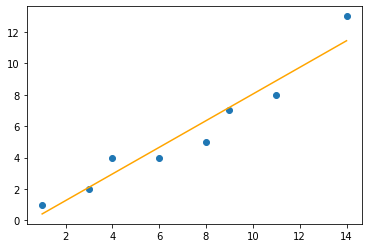

In [50]:
# Your code here.
x=party_data[['X']]
y=party_data['Y']

model=linear_model.LinearRegression()
model.fit(x,y)

y_hat=model.intercept_+model.coef_[0]*x

plt.plot(x.values, y_hat.values, c='orange')

plt.scatter(x,y)
plt.show

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [52]:
# Your response here. 
display(model.intercept_)
display(model.coef_)

model.score(x,y)


-0.43939393939393945

array([0.84848485])

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
